# Análise Exploratória dos Dados (EDA)

Este notebook apresenta a análise exploratória das bases de dados do desafio de análise
de crédito, com foco na compreensão das variáveis, distribuição da variável alvo e
qualidade dos dados.

Os dados utilizados neste notebook foram previamente ingeridos e armazenados em
formato Parquet pelo notebook `00_data_ingestion.ipynb`.


In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [4]:
PROJECT_ROOT = Path.cwd().parent
DATA_PROCESSED_DIR = PROJECT_ROOT / "data" / "processed"

DATA_PROCESSED_DIR

WindowsPath('c:/Users/ggrinspun/Github/desafio-analise-de-credito/data/processed')

In [5]:
df_train = pd.read_parquet(DATA_PROCESSED_DIR / "train.parquet")
df_test  = pd.read_parquet(DATA_PROCESSED_DIR / "test.parquet")
df_oot   = pd.read_parquet(DATA_PROCESSED_DIR / "oot.parquet")

print("Train:", df_train.shape)
print("Test :", df_test.shape)
print("OOT  :", df_oot.shape)

Train: (120750, 151)
Test : (51751, 151)
OOT  : (91965, 150)


In [6]:
df_train

,REF_DATE,TARGET,VAR2,IDADE,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,...,VAR141,VAR142,VAR143,VAR144,VAR145,VAR146,VAR147,VAR148,VAR149,ID
0,2017-06-01 00:00:00+00:00,0,M,34.137,None,RO,-8.808779,-63.878470,D,E,...,2680.289259,D,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,181755
1,2017-08-18 00:00:00+00:00,0,M,40.447,None,PB,-7.146537,-34.926080,E,E,...,1777.725469,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,287633
2,2017-06-30 00:00:00+00:00,0,F,33.515,None,RS,-27.900178,-53.314035,None,E,...,1695.494979,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,88015
3,2017-08-05 00:00:00+00:00,1,F,25.797,None,BA,-12.948874,-38.451863,E,E,...,1399.037809,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,122576
4,2017-07-29 00:00:00+00:00,0,F,54.074,None,RS,-30.051810,-51.213277,B,E,...,7868.793296,C,None,None,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,1272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,2017-03-07 00:00:00+00:00,0,M,30.474,None,BA,-12.900183,-38.673056,E,E,...,1752.116912,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,163230
120746,2017-07-27 00:00:00+00:00,0,F,19.570,None,SP,-22.172110,-47.374184,E,E,...,1510.234174,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,315754
120747,2017-05-04 00:00:00+00:00,0,M,32.882,None,SP,-22.327290,-49.033763,None,E,...,1736.106081,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE,2.6.1,156370
120748,2017-03-04 00:00:00+00:00,1,None,NaN,None,PA,-1.393497,-48.395074,None,E,...,1364.454508,E,None,None,NaN,NaN,102,EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INE...,2.6.1,232713


In [7]:
df_train.describe()

,TARGET,IDADE,VAR6,VAR7,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,...,VAR41,VAR42,VAR44,VAR46,VAR47,VAR141,VAR145,VAR146,VAR147,ID
count,120750.000000,107040.000000,117394.000000,117394.000000,74488.000000,65724.000000,15530.000000,95197.000000,58269.000000,44981.000000,...,117811.000000,107048.000000,401.000000,294.000000,120750.000000,120750.000000,679.000000,168.000000,120750.000000,120750.000000
mean,0.245027,42.125255,-14.411389,-45.903480,0.235917,0.290241,0.313850,0.241245,0.185754,2.044374,...,0.631175,0.504619,1691.738429,6984.218469,0.256543,1854.833006,4018.743785,1942.649762,101.841656,165324.864199
std,0.430105,15.198476,8.995077,7.529788,0.625609,0.308937,0.241229,0.262687,0.195320,3.170869,...,0.222607,0.069614,2177.830516,4621.964093,0.406746,893.999792,3700.836248,3143.757850,0.540016,95488.442320
min,0.000000,18.014000,-33.521563,-72.900276,-4.000000,0.000000,0.000000,0.000000,0.000000,0.083333,...,0.000000,0.006658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,3.000000
25%,0.000000,30.057250,-22.842778,-49.903564,0.000000,0.055000,0.056000,0.105000,0.078000,0.250000,...,0.440572,0.463579,642.000000,3888.995000,0.000000,1513.227400,1633.195000,0.000000,102.000000,82727.250000
50%,0.000000,39.867000,-13.010590,-46.574908,0.000000,0.159000,0.318000,0.140000,0.112000,0.833333,...,0.542298,0.496036,769.000000,5386.310000,0.003000,1627.157652,3024.480000,935.120000,102.000000,165298.000000
75%,0.000000,52.997000,-6.357067,-39.023621,0.000000,0.505000,0.507000,0.168000,0.153000,2.416667,...,0.898052,0.522576,1747.500000,9601.390000,0.421000,1820.670284,5217.670000,2260.125000,102.000000,248248.000000
max,1.000000,105.477000,4.602823,-32.429516,4.000000,1.500000,1.000000,1.700000,1.000000,15.999999,...,1.000000,0.910865,17374.940000,26523.920000,1.000000,33954.140000,33954.140000,17229.200000,102.000000,330581.000000


# Analise de dados ausentes

## linhas

In [77]:
cols_ignore = [
    "ID",
    "TARGET",
    "REF_DATE",
]


In [78]:
feature_cols = [c for c in df_train.columns if c not in cols_ignore]

In [79]:
rows_all_missing = df_train[feature_cols].isnull().all(axis=1)

rows_all_missing.sum()


np.int64(0)

Foi avaliada a existência de observações totalmente desprovidas de informação nas
variáveis explicativas, desconsiderando identificadores, variáveis temporais e a
variável alvo. Não foram identificadas observações
nessa condição, de modo que não se justificou a remoção de linhas do conjunto de dados,
evitando a introdução de viés de seleção.


## Colunas

In [8]:
missing_df = (
    df_train
    .isnull()
    .mean()
    .mul(100)
    .sort_values(ascending=False)
    .to_frame(name="missing_pct")
)

missing_df.head(10)


,missing_pct
VAR146,99.860870
VAR4,99.832712
VAR46,99.756522
VAR45,99.756522
VAR44,99.667909
VAR43,99.667909
VAR145,99.437681
VAR38,99.363147
VAR26,99.165217
VAR27,99.137060


In [9]:
print(missing_df)

        missing_pct
VAR146    99.860870
VAR4      99.832712
VAR46     99.756522
VAR45     99.756522
VAR44     99.667909
...             ...
VAR141     0.000000
VAR147     0.000000
VAR148     0.000000
VAR149     0.000000
ID         0.000000

[151 rows x 1 columns]


In [10]:
missing_info = (
    df_train
    .isnull()
    .mean()
    .mul(100)
    .to_frame(name="missing_pct")
    .join(df_train.dtypes.to_frame(name="dtype"))
    .sort_values("missing_pct", ascending=False)
)

missing_info.head(10)


,missing_pct,dtype
VAR146,99.860870,float64
VAR4,99.832712,object
VAR46,99.756522,float64
VAR45,99.756522,object
VAR44,99.667909,float64
VAR43,99.667909,object
VAR145,99.437681,float64
VAR38,99.363147,object
VAR26,99.165217,float64
VAR27,99.137060,float64


In [11]:
MISSING_THRESHOLD = 60.0

# lista de colunas com missing acima do threshold
cols_high_missing = missing_info[
    missing_info["missing_pct"] > MISSING_THRESHOLD
].index.tolist()

# dataframe apenas com essas colunas
df_high_missing = df_train[cols_high_missing]

df_high_missing.shape


(120750, 29)

In [12]:
df_high_missing

,VAR146,VAR4,VAR46,VAR45,VAR44,VAR43,VAR145,VAR38,VAR26,VAR27,...,VAR17,VAR13,VAR23,VAR21,VAR29,VAR37,VAR36,VAR35,VAR32,VAR16
0,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,0.416667
1,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN
2,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,124.0,S,S,None,0.166667
3,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,112.0,S,S,None,NaN
4,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,3.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120745,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,4.000000
120746,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN
120747,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,0.333,NaN,None,None,None,1.750000
120748,NaN,None,NaN,None,NaN,None,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN


Eliminar colunas com mais de 60% dos dados ausentes, com exceção de Var32

Embora a maioria das variáveis com percentual de dados ausentes superior a 60% tenha
sido removida, a variável VAR32 foi mantida por apresentar baixo número de categorias
distintas e conteúdo semântico relevante. Observou-se que seus valores não nulos
representam estados específicos relacionados à situação financeira do cliente, e que
a ausência da informação pode, por si só, carregar sinal informativo para o modelo.
Dessa forma, optou-se por tratar explicitamente os valores ausentes dessa variável,
mantendo-a no conjunto final de atributos.


In [13]:
EXCEPTION_COLS = ["VAR32"]

cols_to_drop_final = [
    col for col in cols_high_missing
    if col not in EXCEPTION_COLS
]

In [63]:
df_train_reduced = df_train.drop(columns=cols_to_drop_final)
df_test_reduced  = df_test.drop(columns=cols_to_drop_final)
df_oot_reduced   = df_oot.drop(columns=cols_to_drop_final)

In [ ]:
df_train_reduced

Embora a maioria das variáveis com percentual de dados ausentes superior a 60% tenha
sido removida, a variável VAR32 foi mantida por apresentar baixo número de categorias
distintas e conteúdo semântico relevante. Observou-se que seus valores não nulos
representam estados específicos relacionados à situação financeira do cliente, e que
a ausência da informação pode, por si só, carregar sinal informativo para o modelo.
Dessa forma, optou-se por tratar explicitamente os valores ausentes dessa variável,
mantendo-a no conjunto final de atributos.


### var32

In [15]:
pd.DataFrame({
    "column": df_train_reduced.columns,
    "dtype": df_train_reduced.dtypes
}).sort_values("dtype").head(20)

,column,dtype
ID,ID,int64
TARGET,TARGET,int64
VAR147,VAR147,int64
VAR47,VAR47,float64
VAR42,VAR42,float64
VAR41,VAR41,float64
VAR39,VAR39,float64
VAR25,VAR25,float64
VAR24,VAR24,float64
VAR22,VAR22,float64


In [16]:
missing_after = (
    df_train_reduced
    .isnull()
    .mean()
    .mul(100)
    .sort_values(ascending=False)
)

print(missing_after)


VAR32     65.174327
VAR15     51.744099
VAR25     51.744099
VAR19     51.744099
VAR22     51.694410
            ...    
VAR141     0.000000
VAR147     0.000000
VAR148     0.000000
VAR149     0.000000
ID         0.000000
Length: 123, dtype: float64


In [17]:
df_train_reduced["VAR32"].value_counts(normalize=True, dropna=False)


VAR32
None                           0.651743
DECLARACAO NAO ENVIADA         0.289631
CREDITADA                      0.030369
SALDO INEXISTENTE              0.013822
IMPOSTO A PAGAR                0.010178
DECLARACAO ENVIADA             0.003437
DEVOLVIDA A RECEITA FEDERAL    0.000505
AGUARDANDO REAGENDAMENTO       0.000315
Name: proportion, dtype: float64

In [18]:
pd.crosstab(
    df_train_reduced["VAR32"].fillna("NAO_INFORMADO"),
    df_train_reduced["TARGET"],
    normalize="index"
)

TARGET,0,1
VAR32,,
AGUARDANDO REAGENDAMENTO,0.868421,0.131579
CREDITADA,0.818107,0.181893
DECLARACAO ENVIADA,0.773494,0.226506
DECLARACAO NAO ENVIADA,0.770995,0.229005
DEVOLVIDA A RECEITA FEDERAL,0.852459,0.147541
IMPOSTO A PAGAR,0.793328,0.206672
NAO_INFORMADO,0.742636,0.257364
SALDO INEXISTENTE,0.823247,0.176753


In [19]:
df_train_reduced["VAR32"] = df_train_reduced["VAR32"].fillna("NAO_INFORMADO")
df_test_reduced["VAR32"]  = df_test_reduced["VAR32"].fillna("NAO_INFORMADO")
df_oot_reduced["VAR32"]   = df_oot_reduced["VAR32"].fillna("NAO_INFORMADO")


In [20]:
freq = df_train_reduced["VAR32"].value_counts(normalize=True)
rare_cats = freq[freq < 0.01].index

for df in [df_train_reduced, df_test_reduced, df_oot_reduced]:
    df["VAR32"] = df["VAR32"].replace(rare_cats, "OUTROS")


## VARIÁVEIS CATEGÓRICAS × TARGET (global) quick overview

In [86]:
cat_cols = df_train_reduced.select_dtypes(exclude="number").columns.tolist()
cat_cols = [c for c in cat_cols if c not in cols_ignore]


In [87]:
def worst_bad_rate_per_variable(df, col, target="TARGET", min_count=50):
    tmp = df[[col, target]].copy()
    tmp[col] = tmp[col].fillna("NAO_INFORMADO")
    
    stats = (
        tmp
        .groupby(col)[target]
        .agg(
            count="count",
            bad_rate="mean"
        )
    )
    
    # filtra categorias muito pequenas
    stats = stats[stats["count"] >= min_count]
    
    if stats.empty:
        return None
    
    return stats["bad_rate"].max()


In [88]:
worst_bad_rates = {}

for col in cat_cols:
    val = worst_bad_rate_per_variable(df_train_reduced, col)
    if val is not None:
        worst_bad_rates[col] = val

worst_bad_rate_df = (
    pd.Series(worst_bad_rates)
    .sort_values(ascending=False)
    .to_frame(name="max_bad_rate")
)

worst_bad_rate_df.head(10)


,max_bad_rate
VAR142,0.441176
VAR127,0.373832
VAR8,0.329193
VAR130,0.326733
VAR5,0.321207
VAR65,0.313877
VAR57,0.313877
VAR58,0.313877
VAR52,0.313877
VAR54,0.313877


A análise global das variáveis categóricas não identificou categorias associadas a taxas
extremamente elevadas de inadimplência. O maior valor observado de bad rate foi de
aproximadamente 44%, enquanto o menor situou-se em torno de 25%, indicando ausência de
variáveis com comportamento suspeito ou indícios de vazamento de informação. Esses
resultados sugerem que o risco está distribuído entre múltiplos atributos, reforçando
a necessidade de modelagem multivariada.

## profiling categórico

In [89]:
def categorical_profile(df, col, target="TARGET", min_count=50):
    tmp = df[[col, target]].copy()
    tmp[col] = tmp[col].fillna("NAO_INFORMADO")
    
    stats = (
        tmp
        .groupby(col)[target]
        .agg(
            count="count",
            bad_rate="mean"
        )
        .sort_values("count", ascending=False)
    )
    
    profile = {
        "n_categories": stats.shape[0],
        "min_count": stats["count"].min(),
        "max_bad_rate": stats["bad_rate"].max(),
        "min_bad_rate": stats["bad_rate"].min(),
        "stats": stats
    }
    
    return profile


In [90]:
from collections import defaultdict

CAT_MIN_FREQ = 0.01      # 1%
CAT_MIN_COUNT = 50

cols_to_drop_cat = []
cat_rare_maps = {}  # col -> lista de categorias raras

cat_summary = []

for col in cat_cols:
    prof = categorical_profile(df_train_reduced, col)
    stats = prof["stats"]
    
    total = stats["count"].sum()
    freq = stats["count"] / total
    
    # regra 1: variável inútil
    if prof["n_categories"] <= 1:
        cols_to_drop_cat.append(col)
        decision = "drop_single_category"
    
    else:
        # categorias raras
        rare_cats = freq[
            (freq < CAT_MIN_FREQ) | (stats["count"] < CAT_MIN_COUNT)
        ].index.tolist()
        
        if rare_cats:
            cat_rare_maps[col] = rare_cats
            decision = "group_rare"
        else:
            decision = "keep"
    
    cat_summary.append({
        "variable": col,
        "n_categories": prof["n_categories"],
        "max_bad_rate": prof["max_bad_rate"],
        "decision": decision
    })

cat_decisions_df = pd.DataFrame(cat_summary).sort_values(
    "max_bad_rate", ascending=False
)

cat_decisions_df


,variable,n_categories,max_bad_rate,decision
98,VAR142,6,0.500000,group_rare
84,VAR127,6,0.373832,group_rare
3,VAR9,6,0.340426,group_rare
99,VAR148,8,0.333333,group_rare
2,VAR8,6,0.329193,group_rare
...,...,...,...,...
26,VAR69,5,0.257571,keep
77,VAR120,3,0.257571,keep
38,VAR81,6,0.257571,keep
5,VAR32,8,0.257364,group_rare


In [83]:
cols_drop_single = (
    cat_decisions_df
    .query("decision == 'drop_single_category'")
    ["variable"]
    .tolist()
)

df_train_cat = df_train_reduced.drop(columns=cols_drop_single)
df_test_cat  = df_test_reduced.drop(columns=cols_drop_single)
df_oot_cat   = df_oot_reduced.drop(columns=cols_drop_single)

cols_drop_single



['VAR149']

In [93]:
cols_ignore = ["ID", "TARGET", "REF_DATE"]

cat_cols = (
    df_train_cat
    .select_dtypes(exclude="number")
    .columns
)

cat_cols = [c for c in cat_cols if c not in cols_ignore]


In [94]:
CAT_MIN_FREQ = 0.01   # 1%
CAT_MIN_COUNT = 50   # mínimo absoluto

cat_rare_maps = {}

for col in cat_cols:
    counts = df_train_cat[col].value_counts(dropna=False)
    freq = counts / counts.sum()
    
    rare_cats = freq[
        (freq < CAT_MIN_FREQ) | (counts < CAT_MIN_COUNT)
    ].index.tolist()
    
    if rare_cats:
        cat_rare_maps[col] = rare_cats

for col, rare_cats in cat_rare_maps.items():
    for df in [df_train_cat, df_test_cat, df_oot_cat]:
        df[col] = (
            df[col]
            .fillna("NAO_INFORMADO")
            .replace(rare_cats, "OUTROS")
        )



In [95]:
df_train_cat[cat_cols].nunique().sort_values(ascending=False)

VAR5      25
VAR32      6
VAR107     6
VAR110     6
VAR112     6
          ..
VAR58      2
VAR59      2
VAR90      2
VAR100     2
VAR120     2
Length: 100, dtype: int64

In [97]:
set(df_train_cat.columns) == set(df_test_cat.columns), \
set(df_train_cat.drop(columns=["TARGET"]).columns) == set(df_oot_cat.columns)

(True, True)

As variáveis categóricas foram classificadas conforme sua cardinalidade e distribuição
de frequência. Variáveis com uma única categoria foram excluídas por não apresentarem
capacidade discriminativa. Variáveis com categorias ricas foram mantidas após o
agrupamento dessas categorias em um grupo residual, com base na distribuição observada na base de Treino. Categorias
com baixa frequência foram consolidadas em um grupo residual ("OUTROS"), enquanto
valores ausentes foram tratados explicitamente como "NAO_INFORMADO".Essas
transformações visam aumentar a robustez e a estabilidade estatística e evitar problemas de
generalização em dados futuros.


VARIÁVEIS NUMÉRICAS × TARGET (global)

In [53]:
num_cols = (
    df_train_reduced
    .select_dtypes(include="number")
    .drop(columns=["TARGET"], errors="ignore")
    .columns
    .tolist()
)

len(num_cols)


20

In [54]:
def numeric_mean_separation(df, col, target="TARGET"):
    g0 = df.loc[df[target] == 0, col].dropna()
    g1 = df.loc[df[target] == 1, col].dropna()
    
    if g0.empty or g1.empty:
        return None
    
    return abs(g0.mean() - g1.mean())


In [55]:
num_sep = {}

for col in num_cols:
    val = numeric_mean_separation(df_train_reduced, col)
    if val is not None:
        num_sep[col] = val

num_sep_df = (
    pd.Series(num_sep)
    .sort_values(ascending=False)
    .to_frame(name="mean_abs_diff")
)

num_sep_df.head(10)


,mean_abs_diff
ID,626.918896
VAR141,31.674033
IDADE,4.013895
VAR6,0.601595
VAR7,0.528139
VAR14,0.132458
VAR19,0.108979
VAR12,0.065124
VAR18,0.048680
VAR147,0.031110


In [56]:
top_num_vars = num_sep_df.head(3).index.tolist()
top_num_vars


['ID', 'VAR141', 'IDADE']

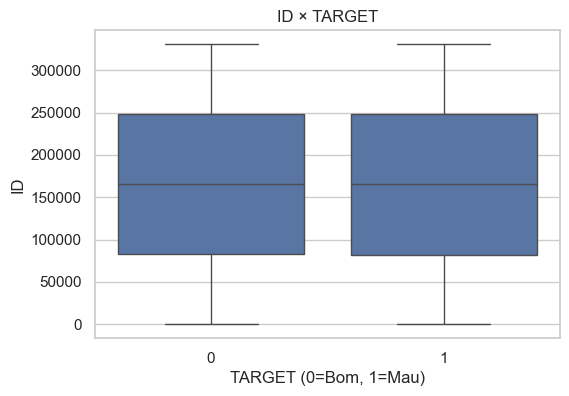

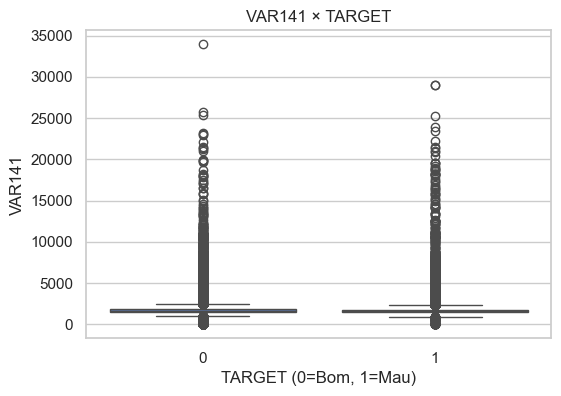

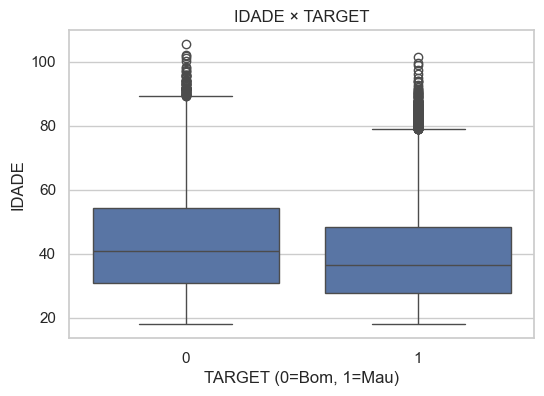

In [57]:
for col in top_num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        x=df_train_reduced["TARGET"],
        y=df_train_reduced[col]
    )
    plt.title(f"{col} × TARGET")
    plt.xlabel("TARGET (0=Bom, 1=Mau)")
    plt.show()


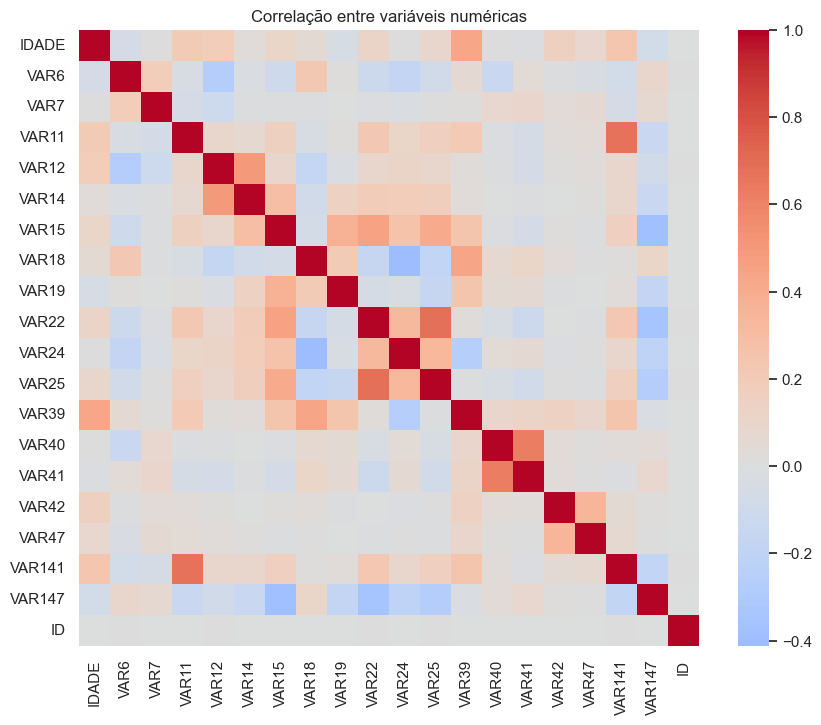

In [58]:
corr = df_train_reduced[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlação entre variáveis numéricas")
plt.show()
